# Customer Churn Analysis
By Aabharan Gupta

The project is made on Customer Churn Analysis. The project contains various markdown cells indicating starting of specific sections and brief methodology has also been reported for the same.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [3]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_auc_score


# Data Wrangling

In [4]:
df=pd.read_csv('Dataset.csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Removing NULL Values

In [8]:
for col in df.columns:
    if df[col].isna().sum()!=0:
        print(col,df[col].isna().sum())

Since there is no output this means the data we have doesn't contain NULL values. 

## Removing Duplicate Values

In [9]:
num_duplicates = df.duplicated().sum()
print(f"There are {num_duplicates} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


There are no duplicate rows 

## Detecting Outliers

In [10]:
columns=['tenure','MonthlyCharges','TotalCharges']
for col in columns:
    med=df['tenure'].median()
    fq=df['tenure'].quantile(0.25)
    tq=df['tenure'].quantile(0.75)
    iqr=tq-fq
    lower_bound = med - (1.5 * iqr)
    upper_bound = med + (1.5 * iqr)

    outlier_count = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)].shape[0]
    print(outlier_count)

0
0
0


No outliers in tenure,monthly billings and total billings of customer

Overall the dataset was really clean as it had no null values or  monthly billings or total billings 

# Exploratory Data Analysis

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Correlations

In [13]:
df['Churn_Encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [15]:
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Encoded']
corr_matrix = df[numeric_cols].corr()

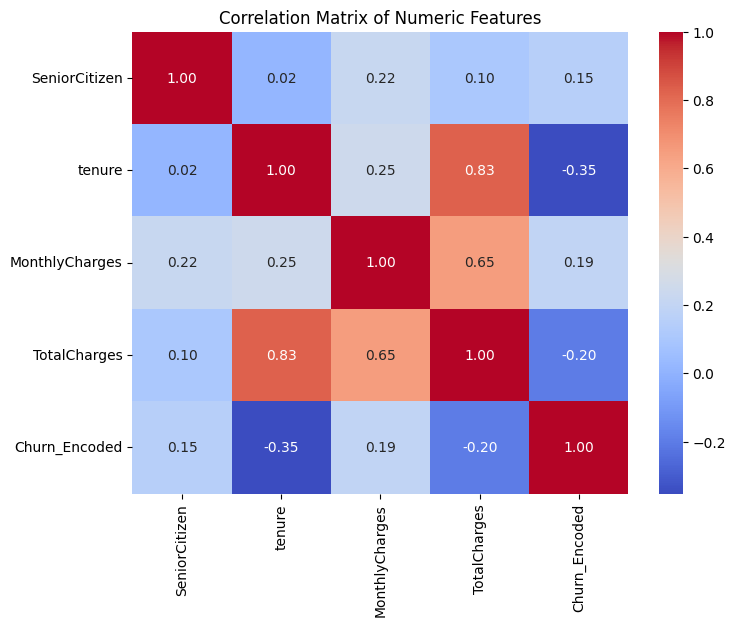

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Observation: A strong correlation can be seen between totalcharges and tenure and total charges and monthly charges

# Visualizations

## Online Security vs Internet Service

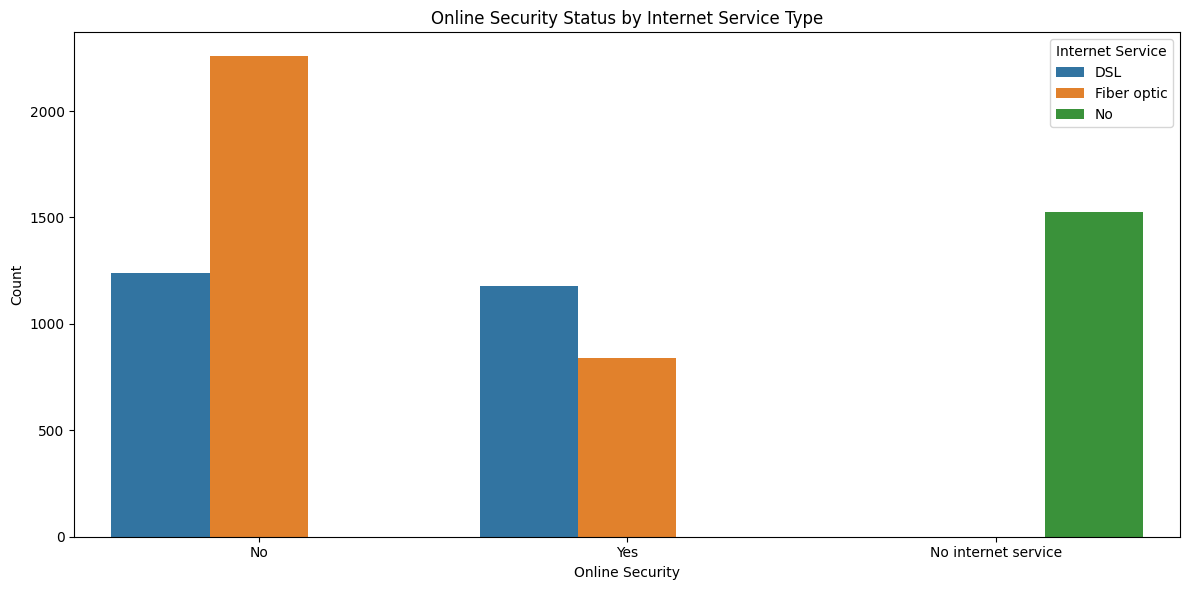

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineSecurity', hue='InternetService', data=df)

plt.title('Online Security Status by Internet Service Type')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Internet Service')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Observations:
Most people who use fiber optic don't have internet service.

## Internet Service vs Online Backup

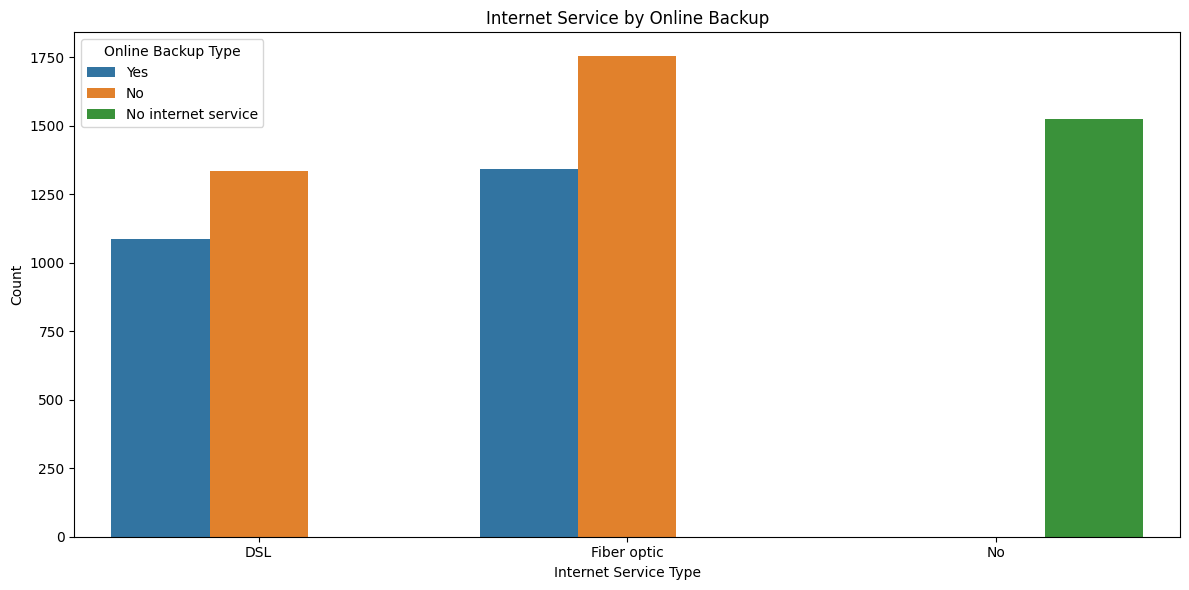

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='InternetService',hue='OnlineBackup',data=df)
plt.title('Internet Service by Online Backup')
plt.legend(title='Online Backup Type')
plt.ylabel('Count')
plt.xlabel('Internet Service Type')
plt.tight_layout()
plt.show()

Observation: Most people don't have online backup 

## Streaming Movies vs Streaming TV

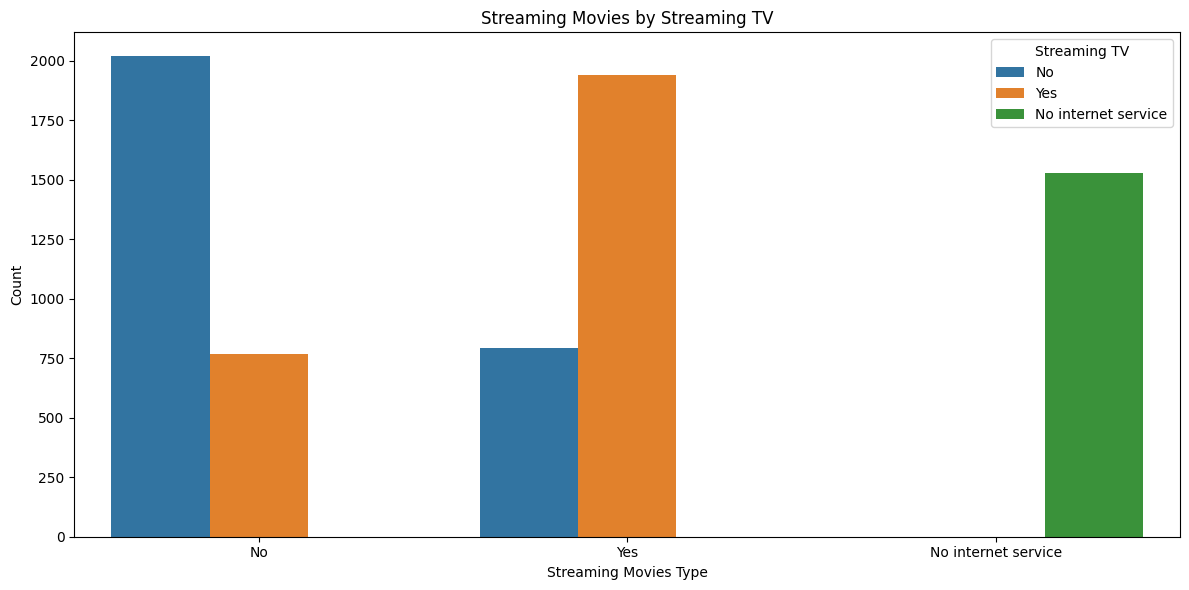

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='StreamingMovies',hue='StreamingTV',data=df)
plt.title('Streaming Movies by Streaming TV')
plt.legend(title='Streaming TV')
plt.ylabel('Count')
plt.xlabel('Streaming Movies Type')
plt.tight_layout()
plt.show()

## Distributions

### Gender

#### Overall

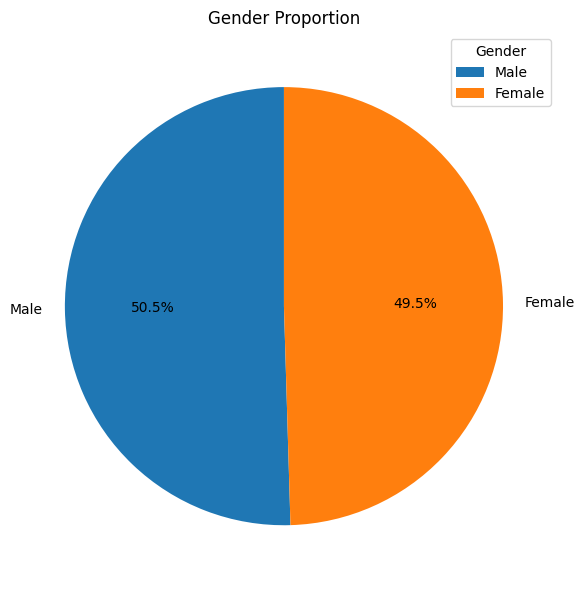

In [20]:
plt.figure(figsize=(12,6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Proportion')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

The dataset is almost balanced for male and female

#### Churn

In [21]:
churned=df[df['Churn']=='Yes']
churned

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Encoded
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,1
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1


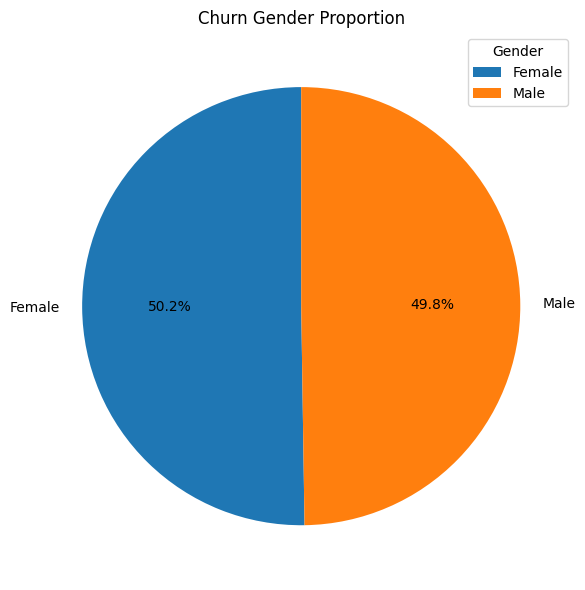

In [22]:
plt.figure(figsize=(12,6))
gender_counts = churned['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Gender Proportion')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

It is evident that females are slightly more likely to leave rather than males although the percentage is almost the same. 

### Contracts

#### Overall

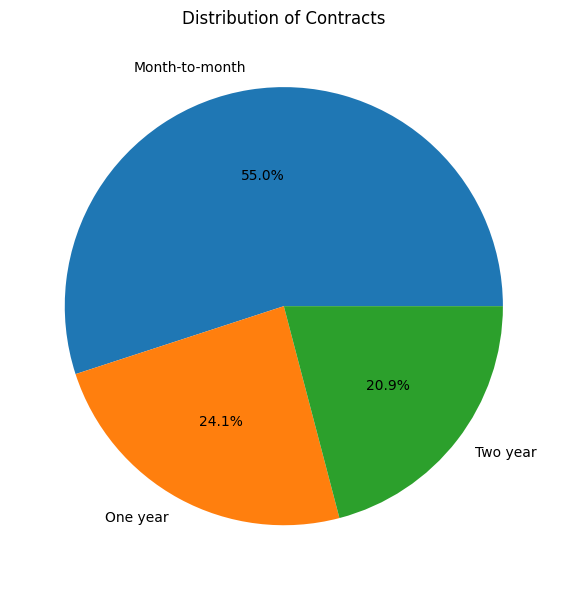

In [23]:
plt.figure(figsize=(12,6))
plt.pie(df['Contract'].value_counts(),labels=df['Contract'].unique(),autopct='%1.1f%%')
plt.title("Distribution of Contracts")
plt.tight_layout()
plt.show()

Observation: Most of the customers have month to month plan and the amount of customers decrease with long term plans

#### Churned

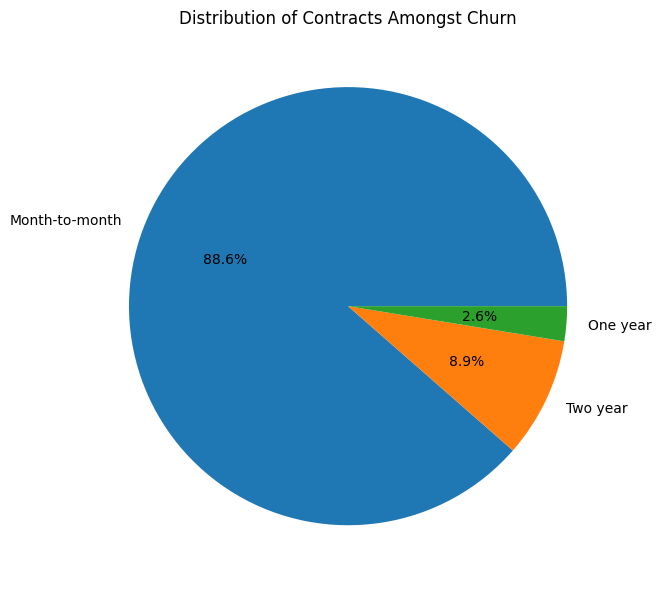

In [24]:
plt.figure(figsize=(12,6))
plt.pie(churned['Contract'].value_counts(),labels=churned['Contract'].unique(),autopct='%1.1f%%')
plt.title("Distribution of Contracts Amongst Churn")
plt.tight_layout()
plt.show()

Customers enrolled in long term plans are less likely to leave.

### Dependants

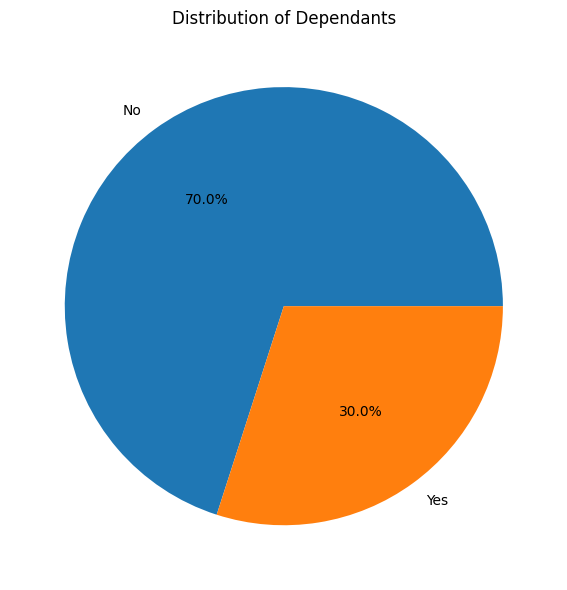

In [25]:
plt.figure(figsize=(12,6))
plt.pie(df['Dependents'].value_counts(),autopct='%1.1f%%',labels=df['Dependents'].unique())
plt.title('Distribution of Dependants')
plt.tight_layout()
plt.show()

### Partner

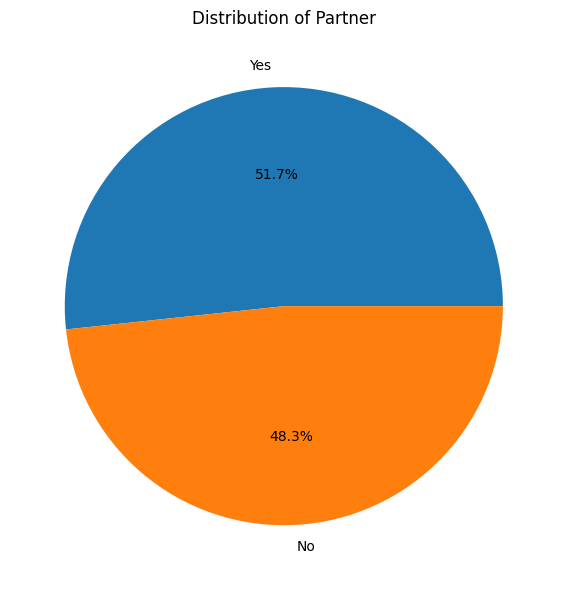

In [26]:
plt.figure(figsize=(12,6))
plt.pie(df['Partner'].value_counts(),autopct='%1.1f%%',labels=df['Partner'].unique())
plt.title('Distribution of Partner')
plt.tight_layout()
plt.show()

The population is almost equally divided into people with and without partner

### Senior Citizen

#### Overall

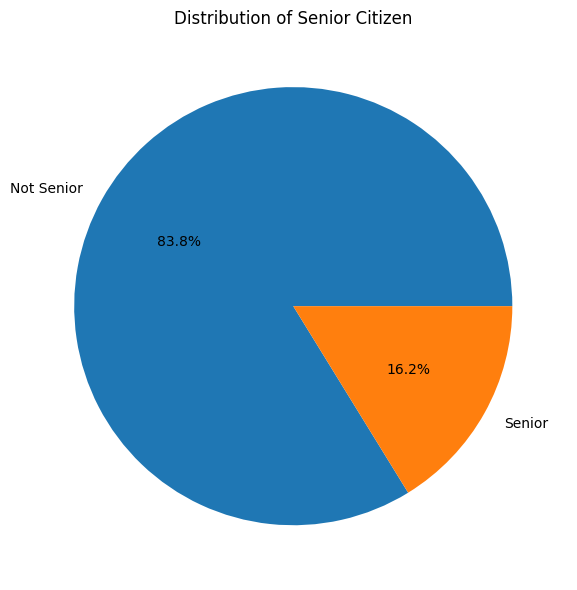

In [27]:
labels = df['SeniorCitizen'].map({0: 'Not Senior', 1: 'Senior'}).value_counts().index
plt.figure(figsize=(12,6))
plt.pie(df['SeniorCitizen'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.title('Distribution of Senior Citizen')
plt.tight_layout()
plt.show()

Maximum population doesn't belong to senior citizen category

#### Churn

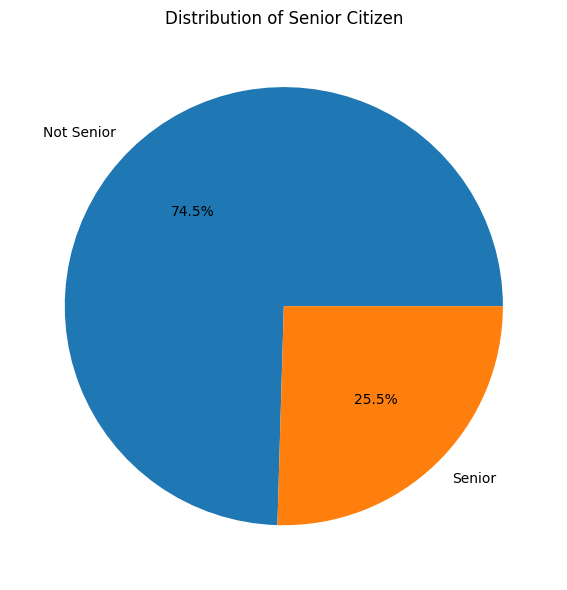

In [28]:
labels = churned['SeniorCitizen'].map({0: 'Not Senior', 1: 'Senior'}).value_counts().index
plt.figure(figsize=(12,6))
plt.pie(churned['SeniorCitizen'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.title('Distribution of Senior Citizen')
plt.tight_layout()
plt.show()

The rise in senior percentage indicates that even seniors are more likely to leave

### Tenure 

#### Overall

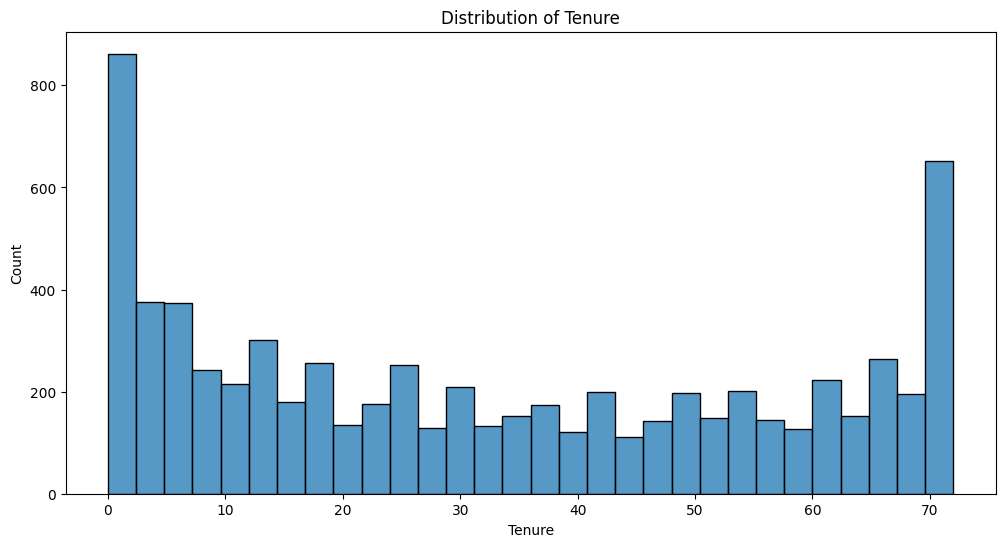

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', bins=30, kde=False)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

#### Churned

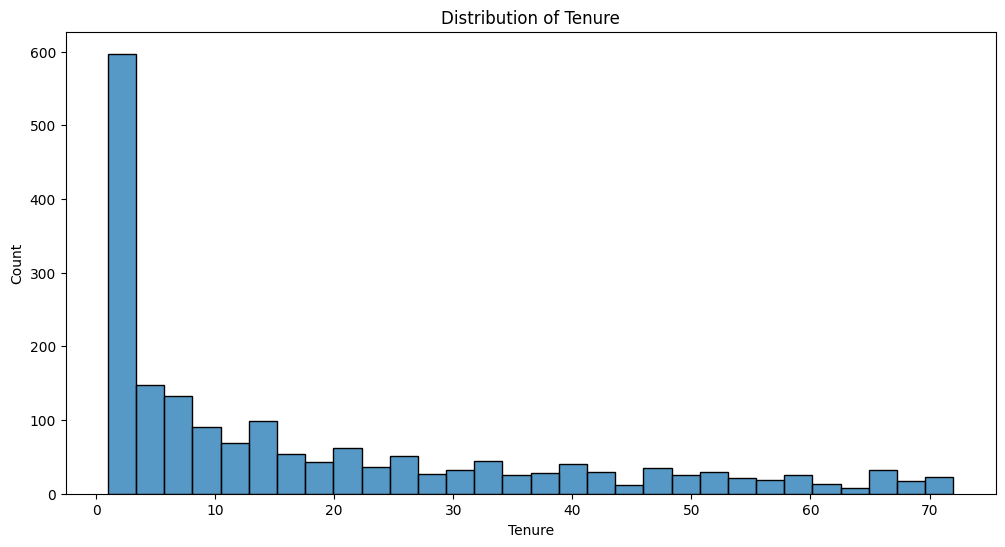

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=churned, x='tenure', bins=30, kde=False)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

Observation: The longer the customer stays, the better probability of them staying further.

### Phone Service

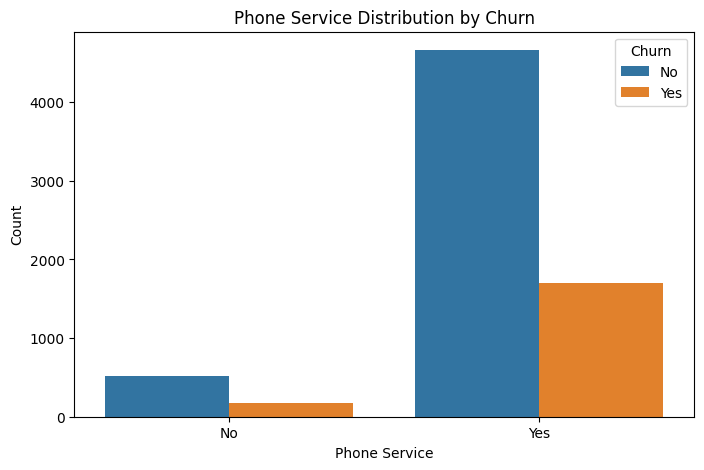

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Phone Service Distribution by Churn')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

### Multiple Lines

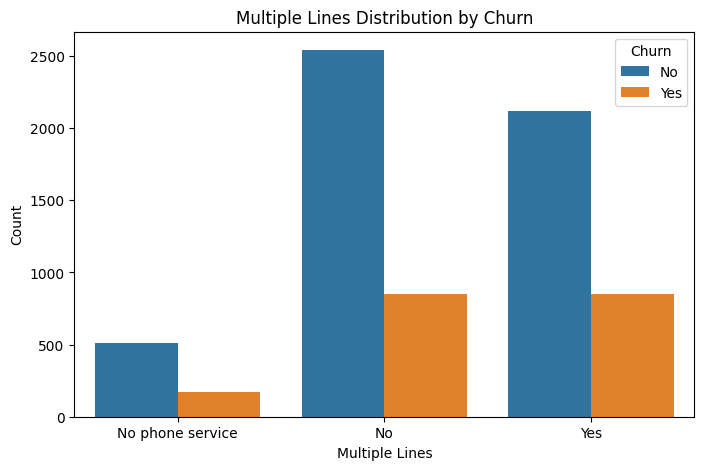

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Multiple Lines Distribution by Churn')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()

### Internet

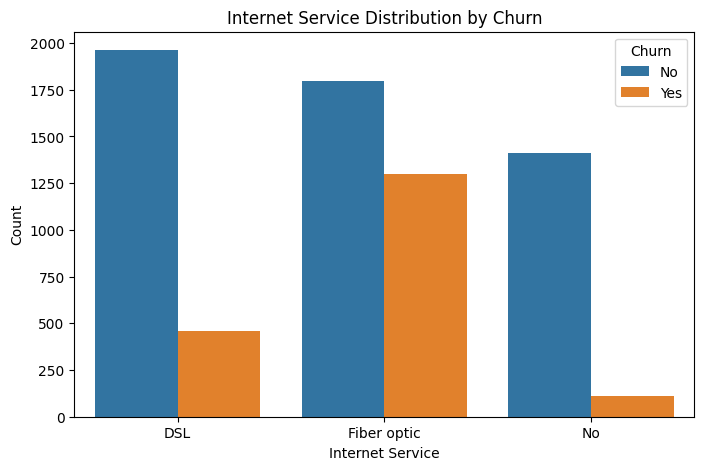

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service Distribution by Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

People with fiber optic are most likely to be part of churn

### Online Security

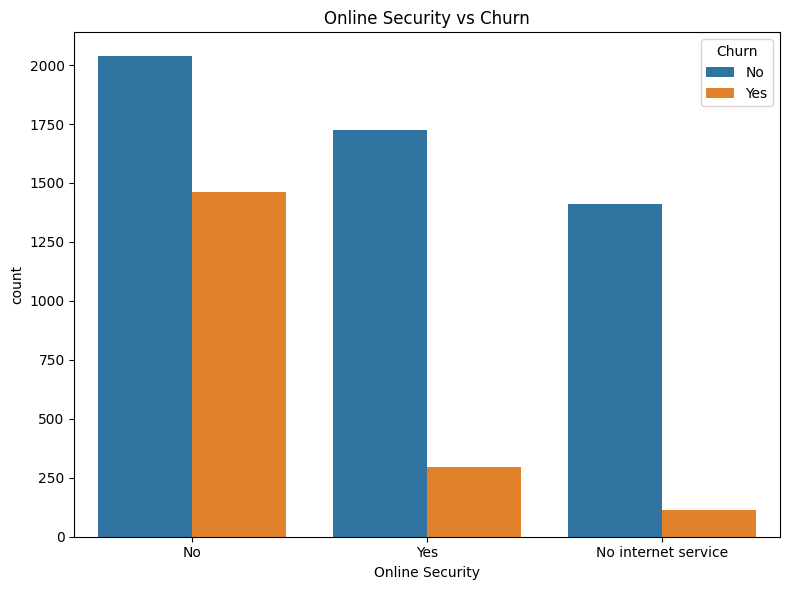

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['OnlineSecurity'],hue=df['Churn'])
plt.xlabel('Online Security')
plt.title('Online Security vs Churn')
plt.tight_layout()
plt.show()

People who don't have online security are more likely to leave

### Internet Services, Online Security vs Churn

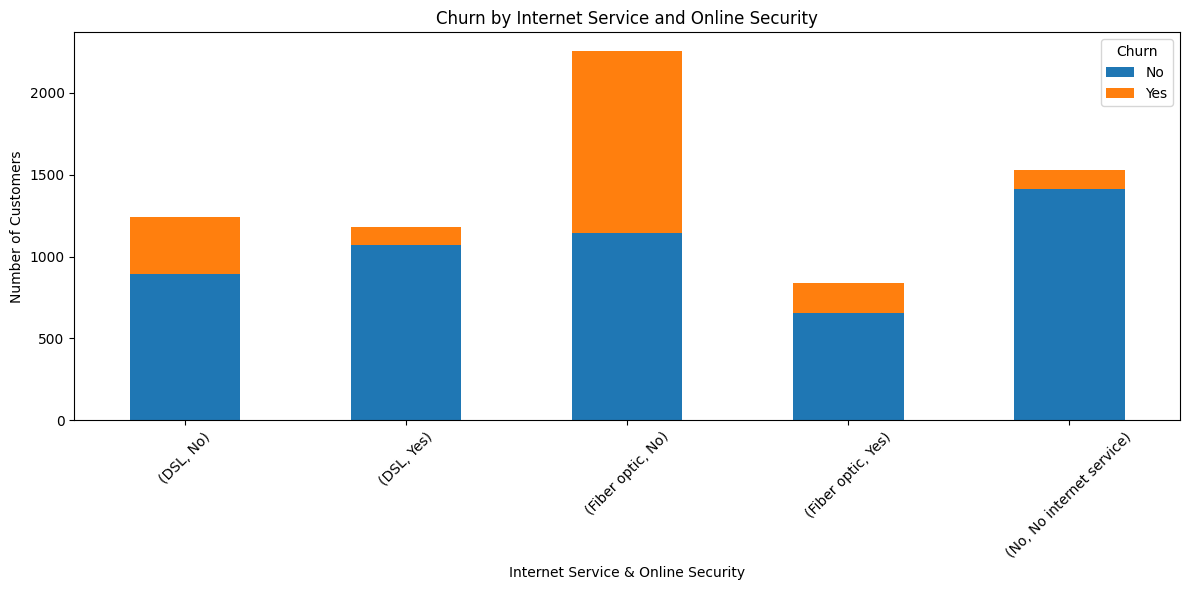

In [35]:
grouped = df.groupby(['InternetService', 'OnlineSecurity', 'Churn']).size().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn by Internet Service and Online Security')
plt.xlabel('Internet Service & Online Security')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Customers with fiber optic who lack online seccurity services are most likely to be the part of churn.

### Online Backup

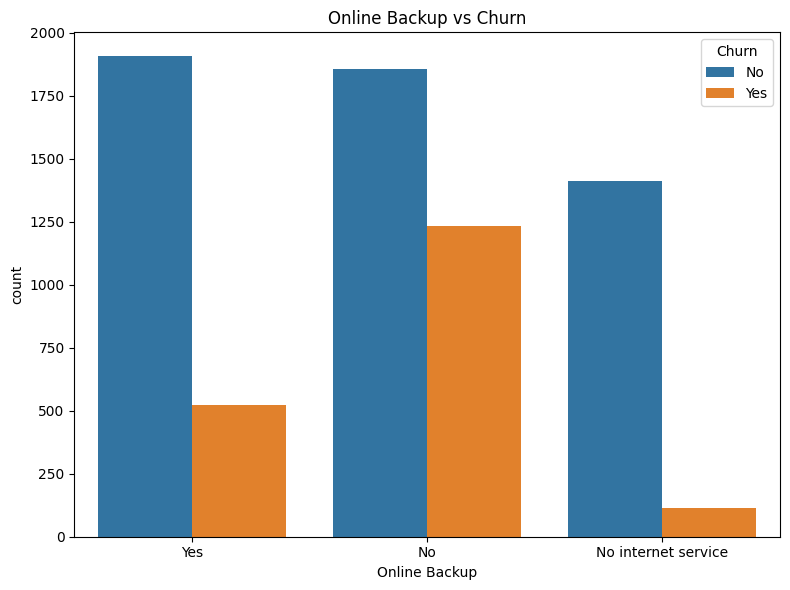

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['OnlineBackup'],hue=df['Churn'])
plt.xlabel('Online Backup')
plt.title('Online Backup vs Churn')
plt.tight_layout()
plt.show()

People who lack online backup are most likely to leave 

### Online Security, Online Backup vs Churn

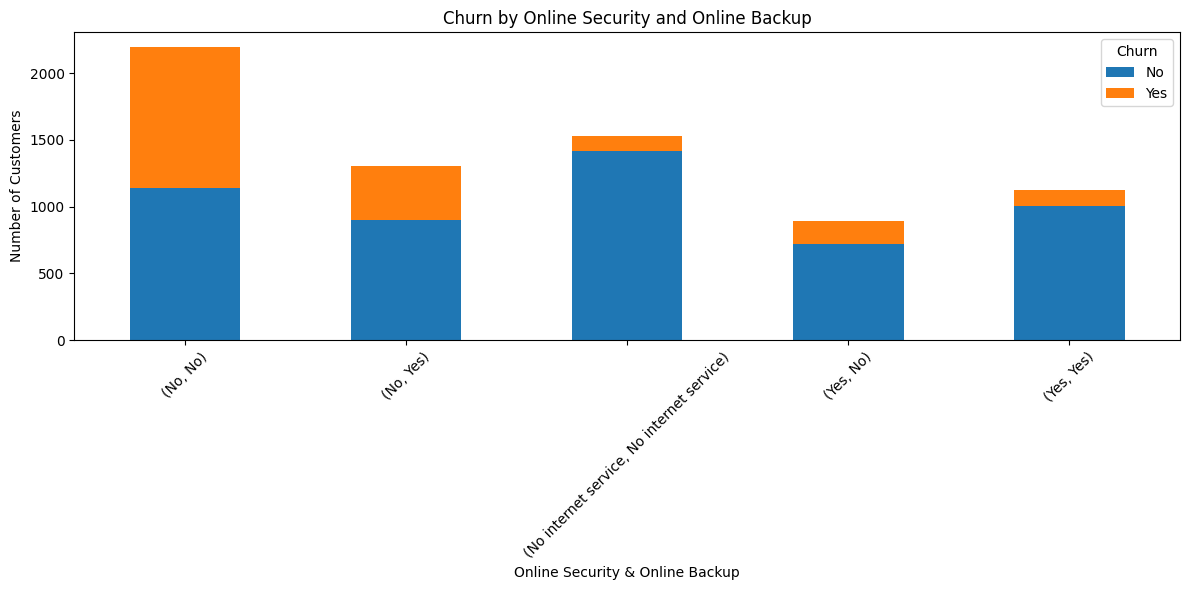

In [37]:
grouped = df.groupby(['OnlineSecurity', 'OnlineBackup', 'Churn']).size().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn by Online Security and Online Backup')
plt.xlabel('Online Security & Online Backup')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In short people who take internet service but don't opt for online backup and online security are most likely to be part of churn.

Also it can be noticed that customers who lack online security are more likely to leave than thode who opt for online security.

### Device Protection

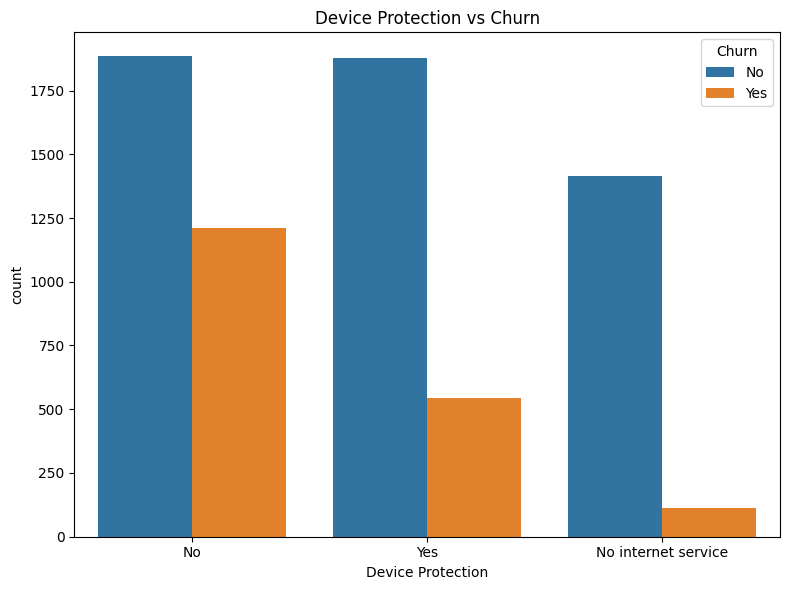

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['DeviceProtection'],hue=df['Churn'])
plt.xlabel('Device Protection')
plt.title('Device Protection vs Churn')
plt.tight_layout()
plt.show()

Customers who don't opt device protection are more likely to leave

### Tech Support

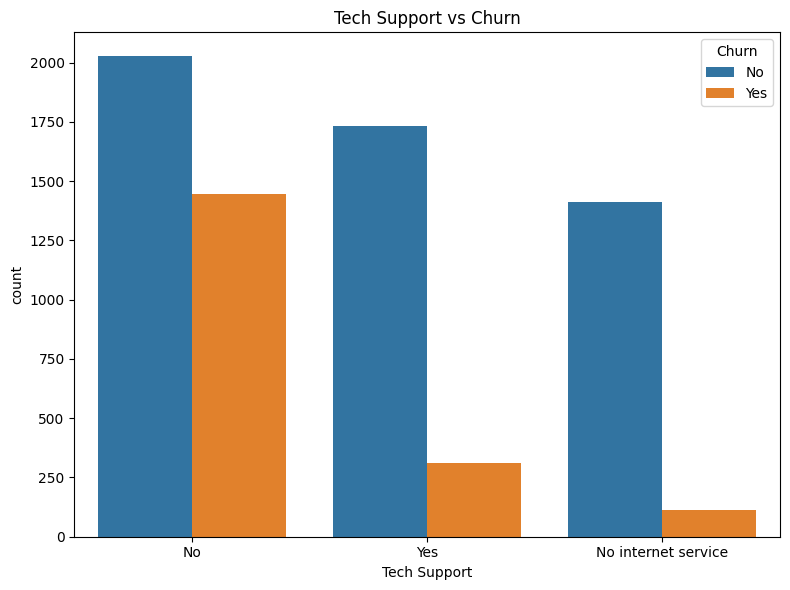

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['TechSupport'],hue=df['Churn'])
plt.xlabel('Tech Support')
plt.title('Tech Support vs Churn')
plt.tight_layout()
plt.show()

People who haven't opted for tech support are more likely to leave than who opted for it.

### Streaming Movies

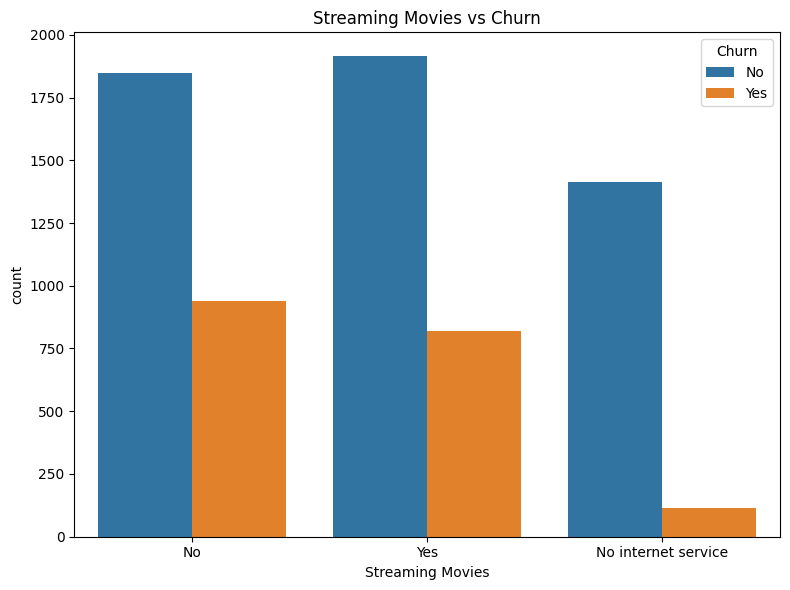

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['StreamingMovies'],hue=df['Churn'])
plt.xlabel('Streaming Movies')
plt.title('Streaming Movies vs Churn')
plt.tight_layout()
plt.show()

### Streaming TV

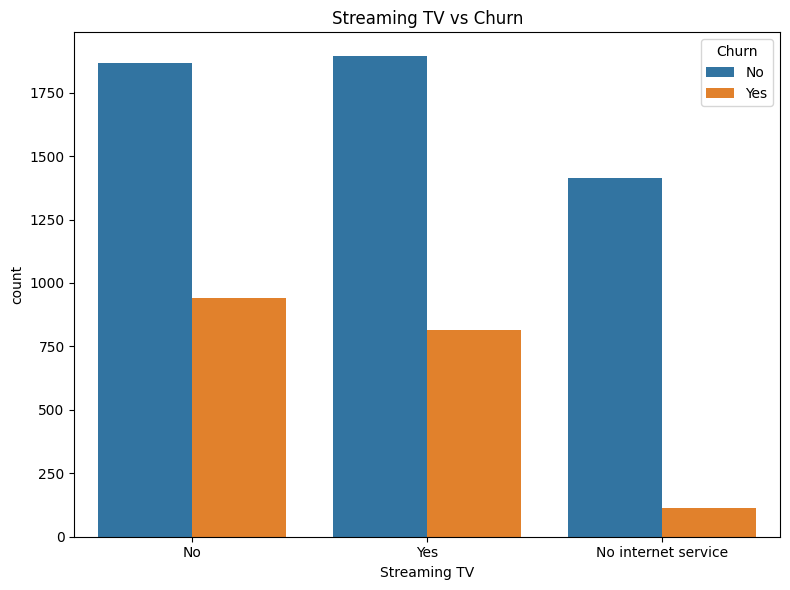

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['StreamingTV'],hue=df['Churn'])
plt.xlabel('Streaming TV')
plt.title('Streaming TV vs Churn')
plt.tight_layout()
plt.show()

### Streaming Movies, Streaming TV vs Churn

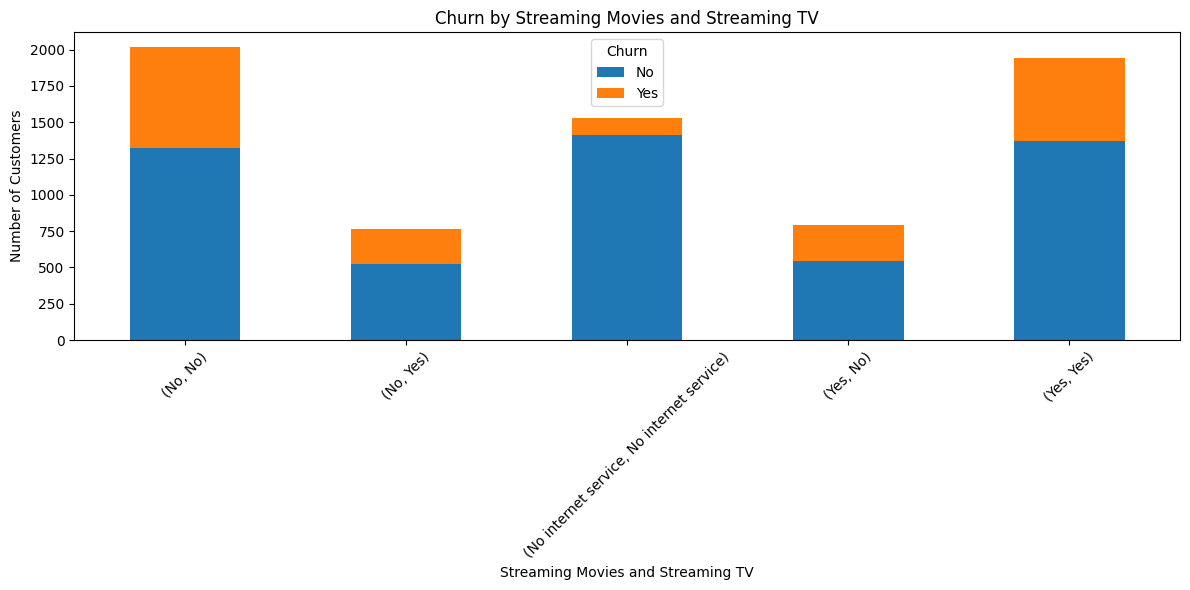

In [42]:
grouped = df.groupby(['StreamingMovies', 'StreamingTV', 'Churn']).size().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn by Streaming Movies and Streaming TV')
plt.xlabel('Streaming Movies and Streaming TV')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Customers who don't opt for the two are most likely to leave. But noticeably if person has opted for both then also a there is a considerable probability of leaving. This means these services are to be worked on.

### Monthly Charges

#### Overall

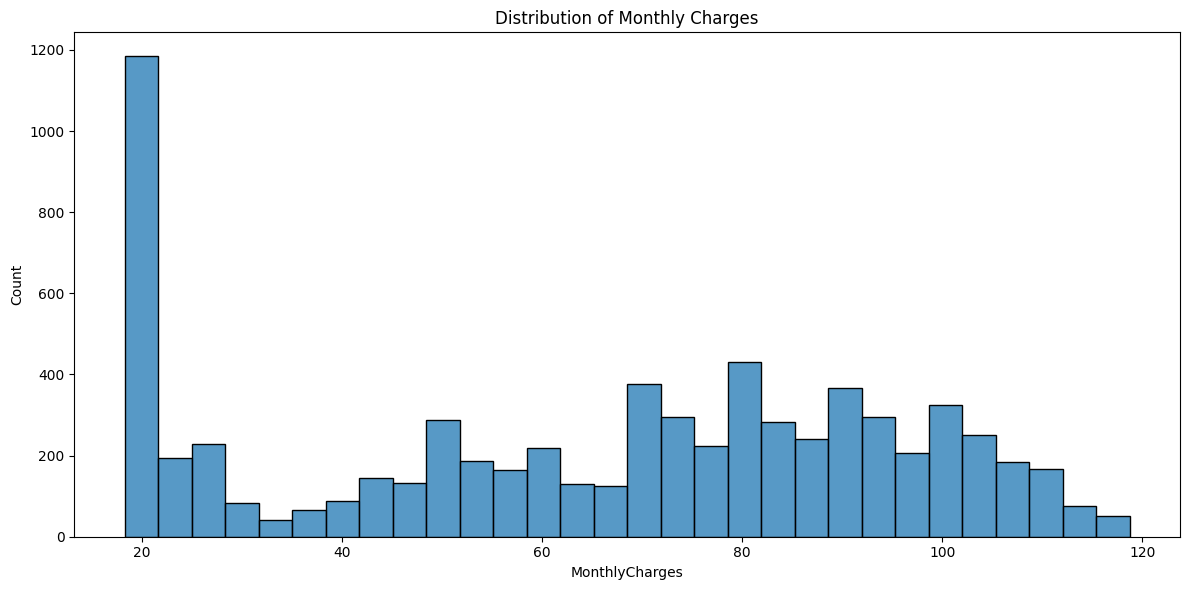

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='MonthlyCharges',bins=30)
plt.title('Distribution of Monthly Charges')
plt.tight_layout()
plt.show()

#### Churned

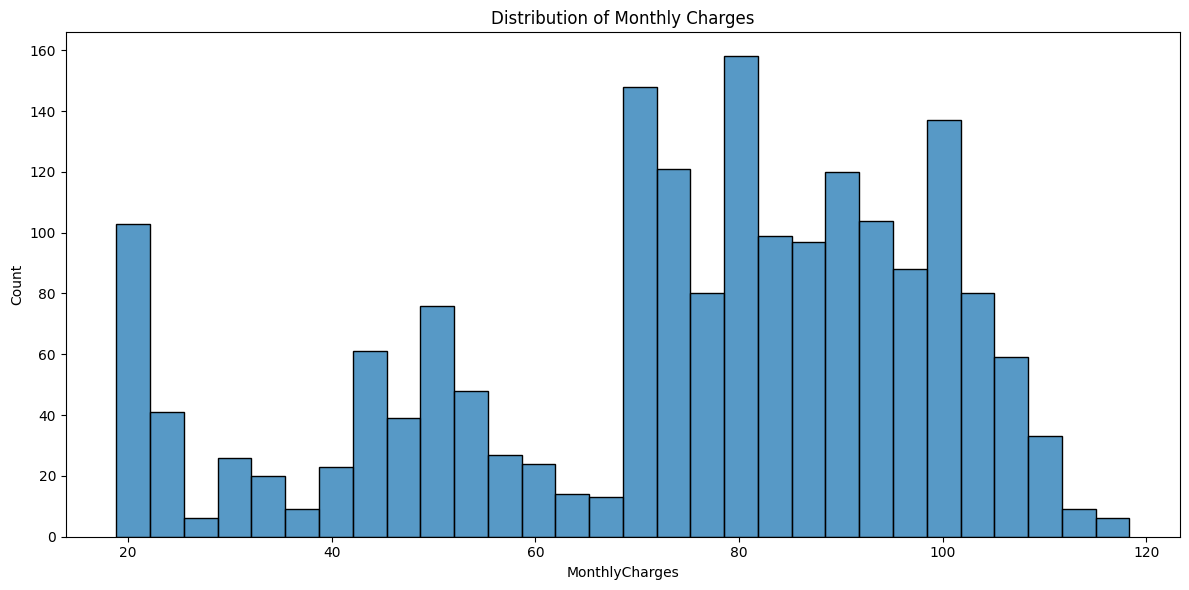

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data=churned,x='MonthlyCharges',bins=30)
plt.title('Distribution of Monthly Charges')
plt.tight_layout()
plt.show()

Clearly customers who have to give monthly charges on the higher end are more likely to leave.

### Total Charges

#### Overall

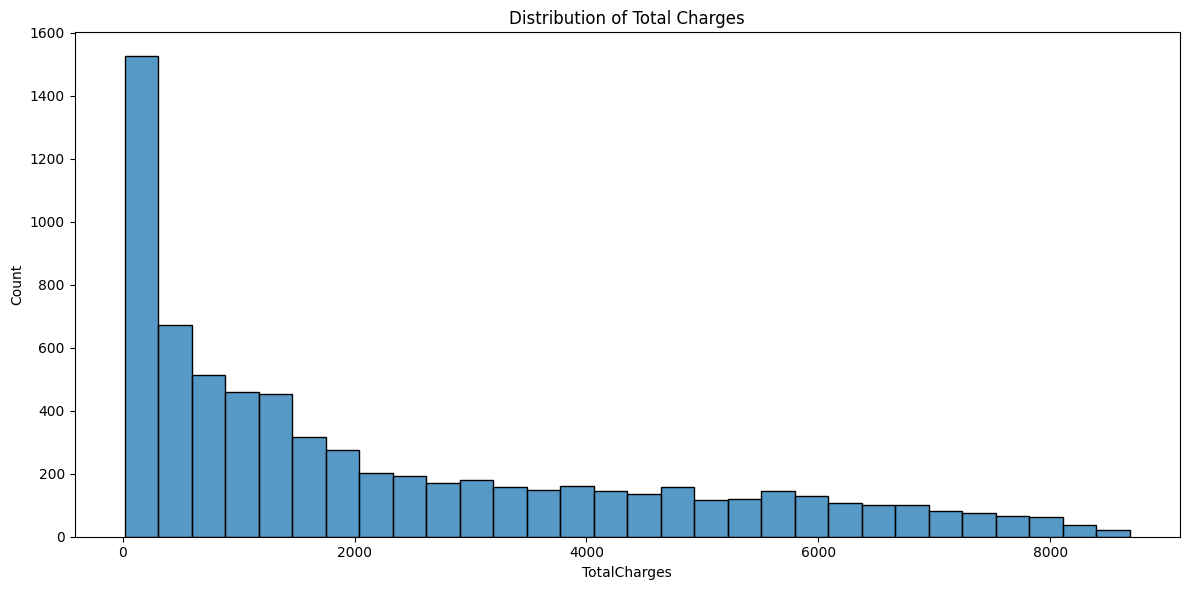

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='TotalCharges',bins=30)
plt.title('Distribution of Total Charges')
plt.tight_layout()
plt.show()

#### Churned

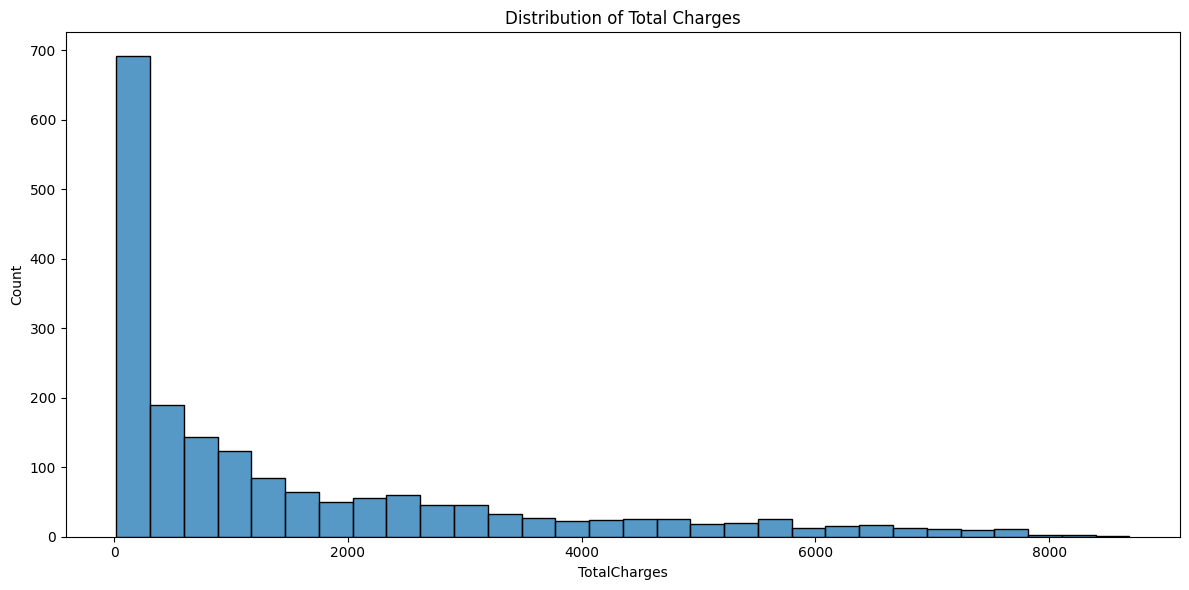

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(data=churned,x='TotalCharges',bins=30)
plt.title('Distribution of Total Charges')
plt.tight_layout()
plt.show()

The more customer pays the more they are likely to not be a part of churn.

This might be happening as most people leave in the initial months of taking services.Thus they pay less total charges then leave.

## Overall Observations

1. Senior Citizens are also likely to leave. This means onky a specific age group is not to be focused.
2. Most people leave in initial months specifically who have to pay higher monthly charges.
3. People who stay more than 10 months are most likely to stay.
4. Most people who leave don't opt for services such as online security,online backup which is a necessity these days.
5. Also services such as streaming tv and movies need to be improved since customers are likely to leave even after using those services. 

# Model Building

## Preprocessing:
Converting categorical features to numerical features.

In [47]:
df.drop(['Churn_Encoded'],axis=1,inplace=True)

In [48]:
catcol=[]
for col in df.columns:
    if df[col].dtype=='object':
        catcol.append(col)
catcol.remove('customerID')
catcol

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [49]:
for col in catcol:
    df[col] = LabelEncoder().fit_transform(df[col])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


## Model Training

We will apply xgboost.
We have tuned hyperparameters using random search

In [50]:
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\A06BH\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:17:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [51]:
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

In [52]:
print("Best Parameters:")
print(random_search.best_params_)

Best Parameters:
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.6}


Now we will look only at customers who are not part of churn but are likely to it's part by setting the threshold as 0.6

In [54]:
active_customers = df[df['Churn'] == 0].copy()
X_active = active_customers.drop(['Churn','customerID'], axis=1)
active_customers['churn_probability'] = best_xgb.predict_proba(X_active)[:, 1]

In [55]:
at_risk_customers = active_customers[active_customers['churn_probability'] > 0.6]

Following are the customers at risk

In [56]:
at_risk_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_probability
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0.648364
31,4929-XIHVW,1,1,1,0,2,1,0,1,0,...,0,2,2,0,1,1,95.50,181.65,0,0.751797
85,4445-ZJNMU,1,0,0,0,9,1,2,1,0,...,0,2,2,0,1,1,99.30,918.75,0,0.760165
91,2424-WVHPL,1,1,0,0,1,1,0,1,0,...,2,0,0,0,0,2,74.70,74.70,0,0.661944
130,2876-GZYZC,0,0,0,0,13,1,2,1,0,...,0,0,2,0,1,2,85.95,1215.65,0,0.648647


In [57]:
at_risk_customers.shape

(248, 22)

A total of 248 customers at risk of churn

## Feature Importance

Below we are looking feature importance of the features used:

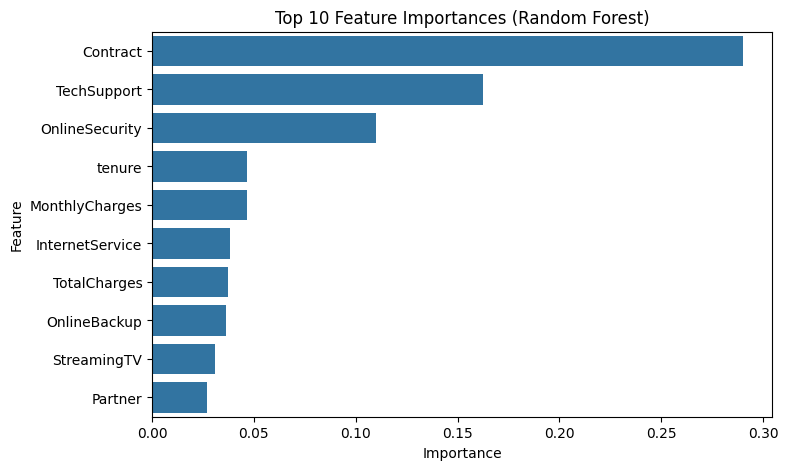

In [61]:
feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

This indicates that the type of contract and tech support are one of the most prominent influencers for customer staying.

## Model Evaluation

In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



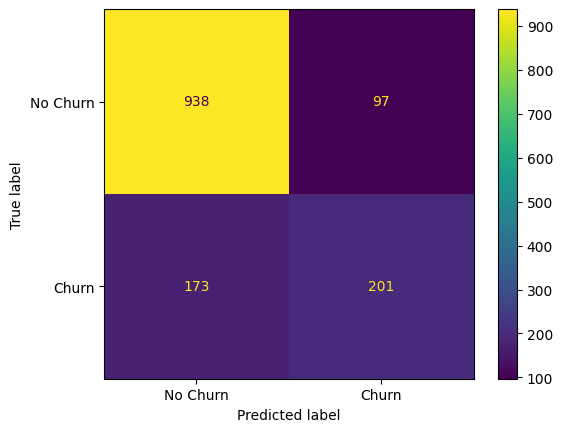

In [63]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()